<a href="https://colab.research.google.com/github/eagle4246/sydneyTestersBootcamp/blob/master/Copy_of_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!/opt/bin/nvidia-smi

Sat Dec 18 15:52:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import os
os.listdir("/content/gdrive/My Drive/Thesis")
os.chdir("/content/gdrive/My Drive/Thesis") #更改路徑
os.getcwd() #查看當前路徑

!unzip TrainingV14.zip
!unzip TestingV14.zip

Archive:  TrainingV14.zip
replace TrainingV14/L001_WA0001_VAR014 1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace TrainingV14/L001_WA0002_VAR014 1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  TestingV14.zip
replace TestingV14/L001_WA0005_VAR014 1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:

# 資料處理套件
import cv2
import csv
import random
import time
import numpy as np
import pandas as pd
import matplotlib.image as mpimg # mpimg 用於讀取圖片
import matplotlib.pyplot as plt # plt 用於顯示圖片
import seaborn as sns
import os

# 設定顯示中文字體
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

# Keras深度學習模組套件
#from tensorflow.keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils as np_utils
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
# tensorflow深度學習模組套件
from tensorflow.keras import models
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D
import seaborn as sns
from tensorflow.keras.models import load_model
random.seed(7777777)

#Set date
from datetime import date

today = date.today()
day = today.strftime("%m%d")
print("Today's date:", day)

Today's date: 0731


In [ ]:
os.getcwd()

# Set SVID
SVID = 7

train_str = f"/content/gdrive/My Drive/Thesis/TrainingV{SVID}/"
test_str = f"/content/gdrive/My Drive/Thesis/TestingV{SVID}/"

img_size = 224

labels = os.listdir(train_str)
print(labels[0][-5])

# 隨機讀取圖片
a = 0
items= []

for a in range(0,len(labels)):
    items.append(a)


X_train = []
Y_train = []
# 製作訓練用資料集及標籤
c = 0
for i in random.sample(items,len(items)):
    
    print(labels[i],c)
    img = cv2.imread(train_str + labels[i], cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
    res = cv2.resize(img,(img_size,img_size),interpolation = cv2.INTER_LINEAR)
    res = img_to_array(res)
    X_train.append(res)    
    Y_train.append(labels[i][-5])
    c+=1

# 轉換至array的格式
X_train = np.array(X_train)
Y_train = np.array(Y_train)    

#Check number of images loaded
X_train.shape

for i in range(len(X_train)):
    X_train[i] = X_train[i].astype('float32')  
    # 將標籤轉換至float格式
    
for j in range(len(Y_train)):
    Y_train[j] = Y_train[j].astype('float32')  
    # 將標籤轉換至float格式
    

# 標籤進行one-hotencoding
Y_train = np_utils.to_categorical(Y_train)

# Check GB Ratio
good = 0
bad = 0
for j in range(len(Y_train)):
  if Y_train[j][0] == 0:
    good += 1
  else:
    bad += 1

print("Good =", good)
print("Bad =", bad)

# Load Testing Images
labels = []
labels = os.listdir(test_str)

X_test = []
Y_test = []
# 製作訓練用資料集及標籤
c = 0
for i in labels:
    print(i,c)
    img = cv2.imread(test_str + i, cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
    res = cv2.resize(img,(img_size,img_size),interpolation = cv2.INTER_LINEAR)
    res = img_to_array(res)
    X_test.append(res)    
    Y_test.append(i[-5])
    c+=1
Y_label_org = Y_test   
# 轉換至array的格式
X_test = np.array(X_test)
Y_test = np.array(Y_test)

for i in range(len(X_test)):
    X_test[i] = X_test[i].astype('float32')  
    # 將標籤轉換至float格式
    
for j in range(len(Y_test)):
    Y_test[j] = Y_test[j].astype('float32')  
    # 將標籤轉換至float格式
    
# # 分配訓練集及測試集比例
# x_test = X
# y_test = Y   

# 標籤進行one-hotencoding
Y_test = np_utils.to_categorical(Y_test)
# y_test = Y

# Check GB Ratio
good = 0
bad = 0
for j in range(len(Y_test)):
  if Y_test[j][0] == 0:
    good += 1
  else:
    bad += 1

print("Good =", good)
print("Bad =", bad)


base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),

)
base_model.trainable = False
base_model.summary()

model = tf.keras.Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.summary()

# # #Create model

# Model optimizer
model.compile(optimizer=optimizers.Adam(lr=2e-6),loss=tf.keras.losses.BinaryCrossentropy(),metrics = ['acc'])


seed = 7777777
traindatagen = ImageDataGenerator(
    rescale=1./255,
    )
valdatagen = ImageDataGenerator(
    rescale=1./255,
    )
# 導入圖像增強參數
traindatagen.fit(X_train)
valdatagen.fit(X_test)

# Check Testing data
Y_test.shape

# Training model

batch_size = 50 
epochs = 100

train_generator = traindatagen.flow(X_train, Y_train, batch_size=batch_size,seed=seed)
val_generator = valdatagen.flow(X_test, Y_test, batch_size=batch_size,seed=seed)

# 檔名設定
file_name = str(epochs)+'_'+str(batch_size)
# 加入EarlyStopping以及Tensorboard等回調函數
# CB = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
# TB = keras.callbacks.TensorBoard(log_dir='./log'+"_"+file_name, histogram_freq=1)

history = model.fit(train_generator,steps_per_epoch=train_generator.n//batch_size, validation_data = val_generator,
                    validation_steps = (val_generator.n//batch_size),
                    epochs=epochs)

def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.title('Learning Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)


# 測試集標籤預測
X_test=X_test/255
y_pred = model.predict(X_test)
X_test=X_test*255
# 整體準確度
count = 0
print("Wafers Predicted as Bad:")
for i in range(len(y_pred)):
    if(np.argmax(y_pred[i]) == np.argmax(Y_test[i])): #argmax函数找到最大值的索引，即为其类别
        count += 1
    else:
        print(labels[i])

print('-----------------------------')
score = count/len(y_pred)
print('Prediction Rate:%.2f%s' % (score*100,'%'))


# 模型預測後的標籤
predict_label = np.argmax(y_pred,axis=1)

# 模型原標籤
true_label = Y_label_org
true_label = np.array(true_label)

test_loss, test_val = model.evaluate(X_test,Y_test)
print("loss",test_loss)
print("val",test_val)
cm = pd.crosstab(true_label,predict_label,rownames=['Actual'],colnames=['Predicted'])
cm
# precision = cm[0][0]/(cm[0][0]+cm[1][0])
# recall = cm[0][0]/(cm[0][0]+cm[0][1])
# f1score = (2*precision*recall)/(precision+recall)
# print("Precision: ", precision)
# print("Recall: ", recall)
# print("F1-score: ", f1score )


NameError: ignored

In [ ]:
cm

Predicted,1
Actual,
0,37
1,285


In [ ]:
precision = cm[0][0]/(cm[0][0]+cm[1][0])
recall = cm[0][0]/(cm[0][0]+cm[0][1])
f1score = (2*precision*recall)/(precision+recall)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1score )

In [ ]:
# X_test = []
# Y_test = []
# # 製作訓練用資料集及標籤
# c = 0
# for i in labels:
#     print(i,c)
#     img = cv2.imread(test_str + i, cv2.IMREAD_UNCHANGED)
#     img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
#     res = cv2.resize(img,(img_size,img_size),interpolation = cv2.INTER_LINEAR)
#     res = img_to_array(res)
#     X_test.append(res)    
#     Y_test.append(i[-5])
#     c+=1
# Y_label_org = Y_test   
# # 轉換至array的格式
# X_test = np.array(X_test)
# Y_test = np.array(Y_test)

# for i in range(len(X_test)):
#     X_test[i] = X_test[i].astype('float32')  
#     # 將標籤轉換至float格式
    
# for j in range(len(Y_test)):
#     Y_test[j] = Y_test[j].astype('float32')  
#     # 將標籤轉換至float格式
    
# # # 分配訓練集及測試集比例
# # x_test = X
# # y_test = Y   

# # 標籤進行one-hotencoding
# Y_test = np_utils.to_categorical(Y_test)
# # y_test = Y

# # Check GB Ratio
# good = 0
# bad = 0
# for j in range(len(Y_test)):
#   if Y_test[j][0] == 0:
#     good += 1
#   else:
#     bad += 1

# print("Good =", good)
# print("Bad =", bad)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

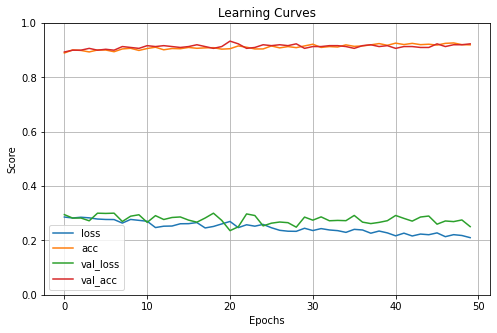

Wafers Predicted as Bad:
L005_WA0053_VAR014 1.png
L070_WA0686_VAR014 1.png
L123_WA1239_VAR014 0.png
L125_WA1247_VAR014 0.png
L127_WA1274_VAR014 0.png
L127_WA1269_VAR014 0.png
L127_WA1268_VAR014 0.png
L126_WA1266_VAR014 0.png
L125_WA1256_VAR014 0.png
L129_WA1288_VAR014 0.png
L127_WA1276_VAR014 0.png
L128_WA1278_VAR014 0.png
L127_WA1270_VAR014 0.png
L127_WA1273_VAR014 0.png
L128_WA1282_VAR014 0.png
L130_WA1308_VAR014 0.png
L130_WA1299_VAR014 0.png
L132_WA1326_VAR014 0.png
L130_WA1298_VAR014 0.png
L130_WA1304_VAR014 0.png
L131_WA1311_VAR014 0.png
L135_WA1352_VAR014 0.png
L136_WA1362_VAR014 0.png
L137_WA1379_VAR014 0.png
L136_WA1366_VAR014 0.png
L137_WA1375_VAR014 0.png
L137_WA1377_VAR014 0.png
L143_WA1432_VAR014 0.png
L140_WA1410_VAR014 0.png
-----------------------------
Prediction Rate:91.32%
11/11 [==============================] - 1s 133ms/step - loss: 1.7844 - acc: 0.8802
loss 1.784380316734314
val 0.8802395462989807


Predicted,0,1
Actual,,
0,14,27
1,2,291


In [ ]:
base_model.trainable = True
set_trainable = False
for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
base_model.summary()

model.summary()
model.compile(optimizer=optimizers.Adam(lr=1e-6),loss=tf.keras.losses.BinaryCrossentropy(),metrics = ['acc'])

seed = 7777777
traindatagen = ImageDataGenerator(
    rescale=1./255,
    )
valdatagen = ImageDataGenerator(
    rescale=1./255,
    )
# 導入圖像增強參數
traindatagen.fit(X_train)
valdatagen.fit(X_test)

# Check Testing data
Y_test.shape

# Training model

batch_size = 50 
epochs = 50

train_generator = traindatagen.flow(X_train, Y_train, batch_size=batch_size,seed=seed)
val_generator = valdatagen.flow(X_test, Y_test, batch_size=batch_size,seed=seed)

# 檔名設定
file_name = str(epochs)+'_'+str(batch_size)
# 加入EarlyStopping以及Tensorboard等回調函數
# CB = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
# TB = keras.callbacks.TensorBoard(log_dir='./log'+"_"+file_name, histogram_freq=1)

# history = model.fit(
#     X_train ,  Y_train,
#     batch_size = batch_size,
#     epochs = epochs,
#     # validation_split = 0.2,
#     # callbacks = [CB]
# )

history = model.fit(train_generator,steps_per_epoch=train_generator.n//batch_size, validation_data = val_generator,
                    validation_steps = (val_generator.n//batch_size),
                    epochs=epochs)


def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.title('Learning Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)


# 測試集標籤預測
X_test=X_test/255
y_pred = model.predict(X_test)
X_test=X_test*255
# 整體準確度
count = 0
print("Wafers Predicted as Bad:")
for i in range(len(y_pred)):
    if(np.argmax(y_pred[i]) == np.argmax(Y_test[i])): #argmax函数找到最大值的索引，即为其类别
        count += 1
    else:
        print(labels[i])

print('-----------------------------')
score = count/len(y_pred)
print('Prediction Rate:%.2f%s' % (score*100,'%'))


# 模型預測後的標籤
predict_label = np.argmax(y_pred,axis=1)

# 模型原標籤
true_label = Y_label_org
true_label = np.array(true_label)

test_loss, test_val = model.evaluate(X_test,Y_test)
print("loss",test_loss)
print("val",test_val)
pd.crosstab(true_label,predict_label,rownames=['Actual'],colnames=['Predicted'])

In [ ]:
# tensorflow深度學習模組套件
from tensorflow.keras import models
from tensorflow.keras.models import Sequential, load_model, Model
import cv2
from google.colab.patches import cv2_imshow
from keras import backend as K
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/gdrive/My Drive/Thesis/TestingV10/L121_WA1221_VAR010 1.png"
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

In [ ]:
layer_outputs = [layer.output for layer in base_model.layers[1:8]]
activation_model = Model(inputs=base_model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[1]
last_layer_activation = activations[5] 

In [ ]:
model.predict(img_tensor)

array([[1.000000e+00, 2.081711e-27]], dtype=float32)

In [ ]:
layer_outputs

[<tf.Tensor 'block1_conv1/Identity:0' shape=(None, 224, 224, 64) dtype=float32>,
 <tf.Tensor 'block1_conv2/Identity:0' shape=(None, 224, 224, 64) dtype=float32>,
 <tf.Tensor 'block1_pool/Identity:0' shape=(None, 112, 112, 64) dtype=float32>,
 <tf.Tensor 'block2_conv1/Identity:0' shape=(None, 112, 112, 128) dtype=float32>,
 <tf.Tensor 'block2_conv2/Identity:0' shape=(None, 112, 112, 128) dtype=float32>,
 <tf.Tensor 'block2_pool/Identity:0' shape=(None, 56, 56, 128) dtype=float32>,
 <tf.Tensor 'block3_conv1/Identity:0' shape=(None, 56, 56, 256) dtype=float32>]

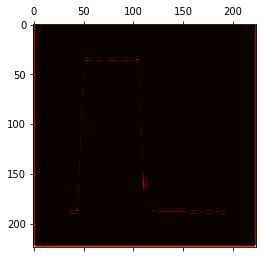

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :,8], cmap='hot')

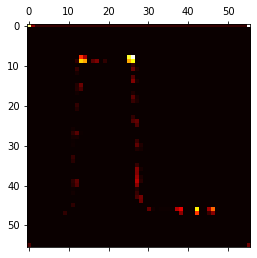

In [ ]:
plt.matshow(last_layer_activation[0, :, :, 49], cmap='hot')

In [ ]:
layer_names = []
for layer in base_model.layers[1:8]:
  layer_names.append(layer.name)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


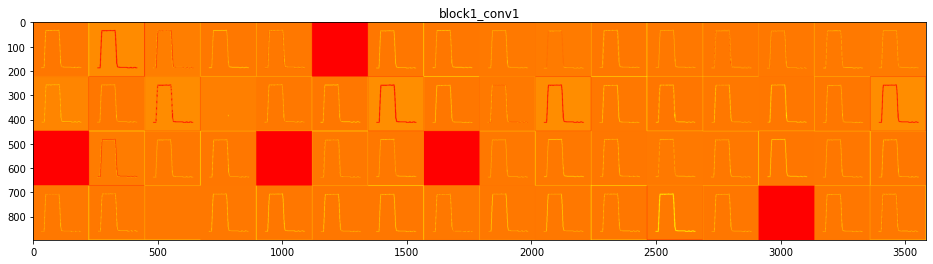

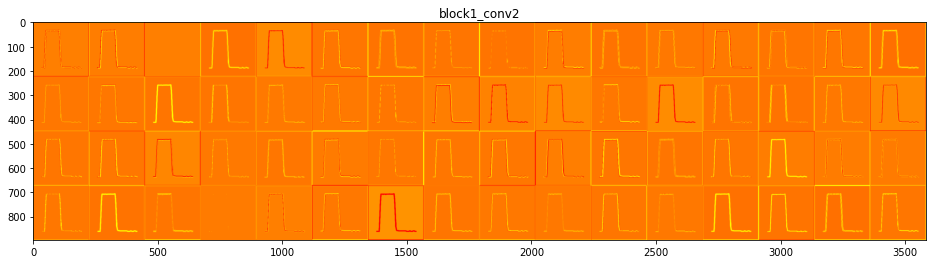

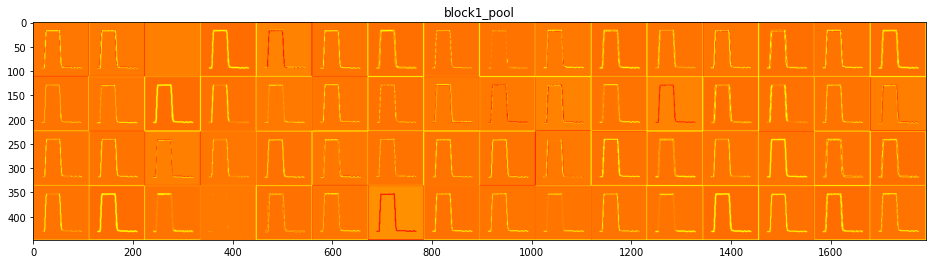

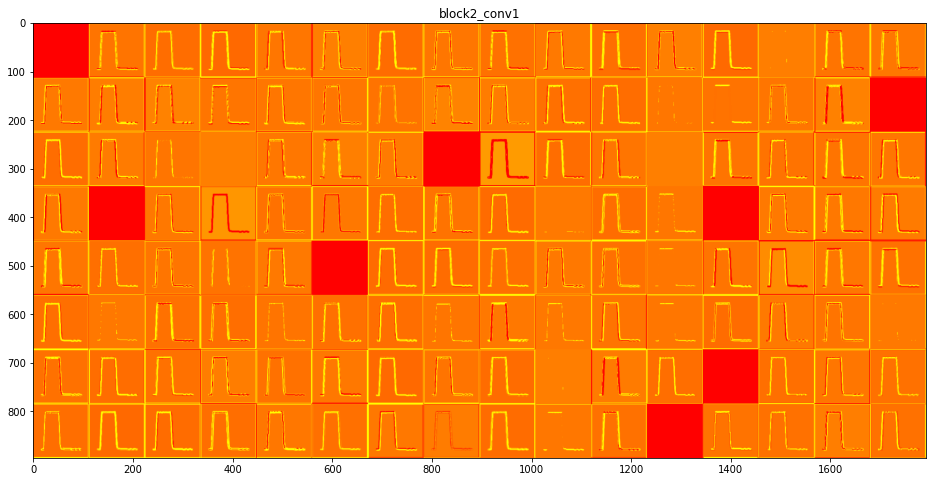

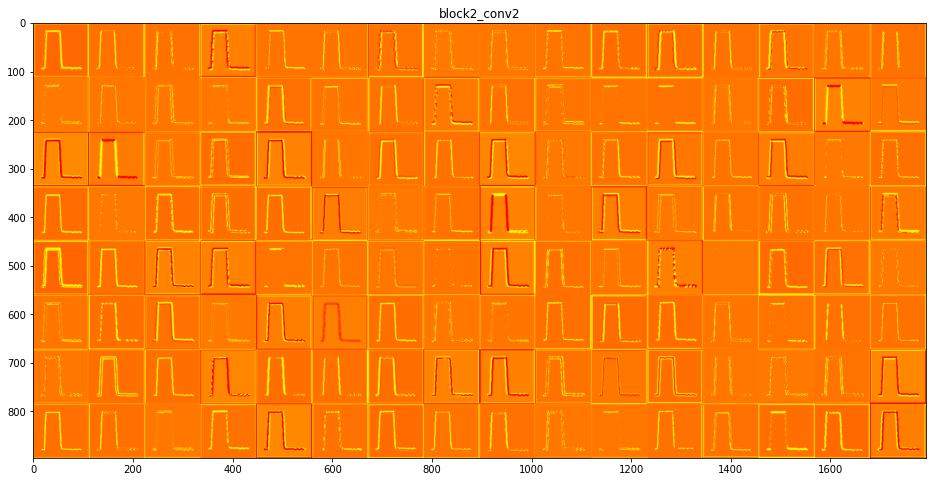

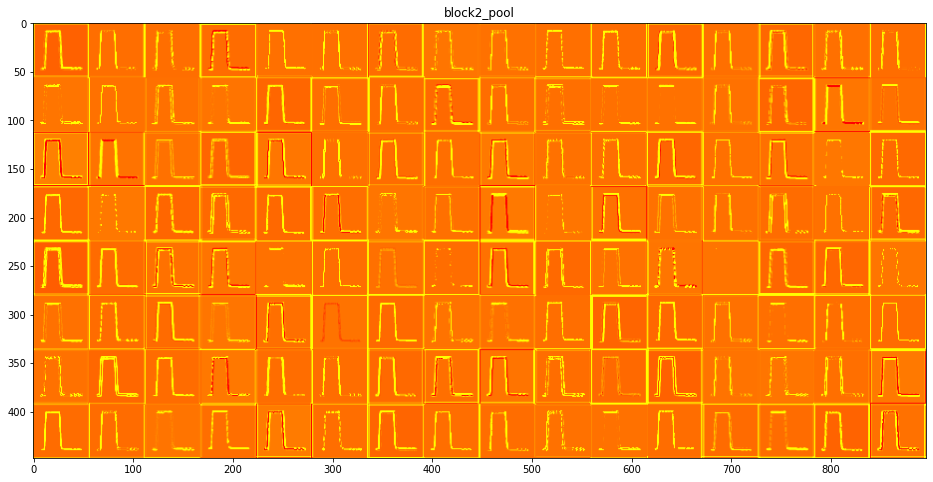

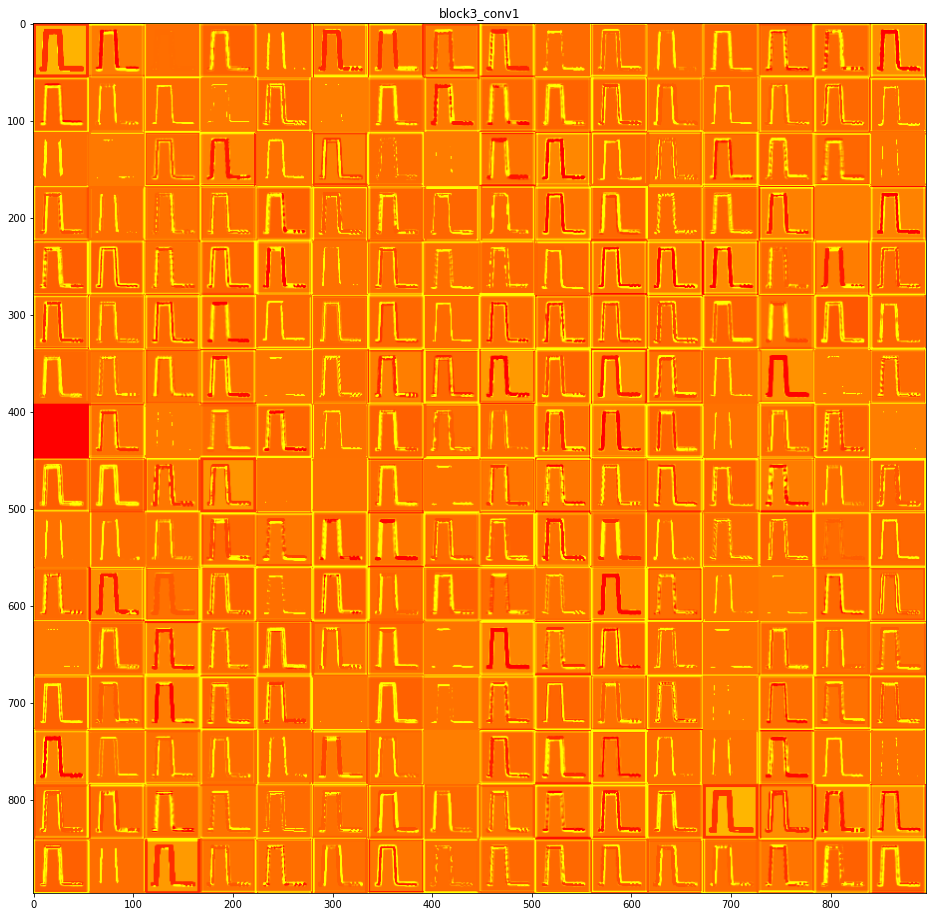

In [ ]:

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,
      :, :,
      col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size,
      row * size : (row + 1) * size] = channel_image
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
  scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='autumn')

In [ ]:

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
# print('Predicted:', decode_predictions(preds, top=2)[0])

In [ ]:
african_e66lephant_output = base_model.output[:, np.argmax(preds[0])]
last_conv_layer = base_model.get_layer('block5_conv3')

In [ ]:
grads = K.gradients(african_e66lephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([base_model.input],
[pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(last_conv_layer.output_shape[3]):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

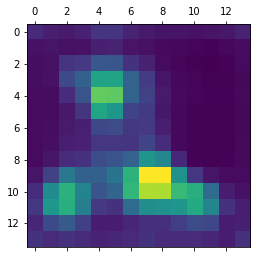

In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)


In [ ]:

img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
# superimposed_img = heatmap * 0.2 + img

# superimposed_img = superimposed_img / np.max(superimposed_img)
# plt.imshow(superimposed_img)

261
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305


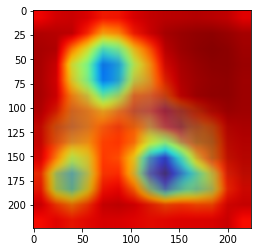

In [ ]:
fig = plt.figure(frameon=False)
k = np.zeros((224,224,3))
c = 0 
# for i in labels:
for i in range(0,Y_test.shape[0]):
  if(Y_test[i,0]==1):
    img = cv2.imread(test_str + labels[i], cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
    res = cv2.resize(img,(img_size,img_size),interpolation = cv2.INTER_LINEAR)
    print(i)

    x = image.img_to_array(res)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    african_e66lephant_output = base_model.output[:, np.argmax(preds[0])]
    last_conv_layer = base_model.get_layer('block5_conv3')
    grads = K.gradients(african_e66lephant_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([base_model.input],
    [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(last_conv_layer.output_shape[3]):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (res.shape[1], res.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    k = k + heatmap
    c = c + 1

k = k / c
k = k / np.max(k)
plt.imshow(k)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


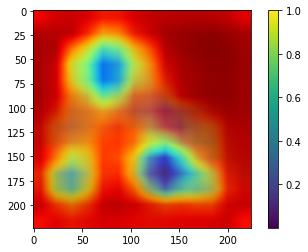

In [ ]:


superimposed_img = k * 1 + tempG

# superimposed_img = superimposed_img / np.max(superimposed_img)

plt.imshow(superimposed_img)
plt.colorbar()

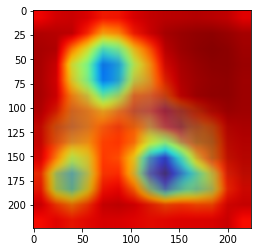

In [ ]:
plt.imshow(k)

In [ ]:
k

array([[[0.93329075, 0.01387114, 0.        ],
        [0.93329075, 0.01387114, 0.        ],
        [0.93329075, 0.01387114, 0.        ],
        ...,
        [0.88437671, 0.00292024, 0.        ],
        [0.88437671, 0.00292024, 0.        ],
        [0.88437671, 0.00292024, 0.        ]],

       [[0.93329075, 0.01387114, 0.        ],
        [0.93329075, 0.01387114, 0.        ],
        [0.93329075, 0.01387114, 0.        ],
        ...,
        [0.88437671, 0.00292024, 0.        ],
        [0.88437671, 0.00292024, 0.        ],
        [0.88437671, 0.00292024, 0.        ]],

       [[0.93329075, 0.01387114, 0.        ],
        [0.93329075, 0.01387114, 0.        ],
        [0.93329075, 0.01387114, 0.        ],
        ...,
        [0.88437671, 0.00292024, 0.        ],
        [0.88437671, 0.00292024, 0.        ],
        [0.88437671, 0.00292024, 0.        ]],

       ...,

       [[0.95884285, 0.04197846, 0.        ],
        [0.95884285, 0.04197846, 0.        ],
        [0.95884285, 0

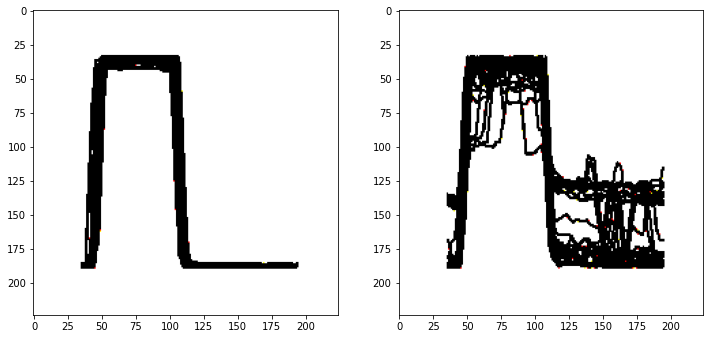

In [ ]:

from matplotlib.pyplot import figure


fig = plt.figure(figsize=(12, 12))


tempG = np.zeros((224,224,3))
c = 0

for i in range(0,Y_test.shape[0]):
  if(Y_test[i,0]==0):
    A = X_test[i,:,:,:]
    A[A==1] = 0
    c = c + 1
    tempG = tempG + A

tempG = tempG / c
tempG[tempG>0] = 0.00001
tempG[tempG==0] = 1
plt.subplot(1, 2, 1)
plt.imshow(tempG)

tempB = np.zeros((224,224,3))
c = 0
for i in range(0,Y_test.shape[0]):
  if(Y_test[i,0]==1):
    A = X_test[i,:,:,:]
    A[A==1] = 0
    c = c + 1
    tempB = tempB + A

tempB = tempB / c
tempB[tempB>0] = 0.00001
tempB[tempB==0] = 1
plt.subplot(1, 2, 2)
plt.imshow(tempB)



In [ ]:
X_test = X_test/255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


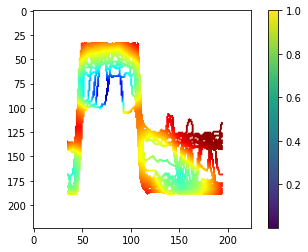

In [ ]:
heatmap = heatmap / np.max(heatmap)

superimposed_img = heatmap * 1 + tempB

# superimposed_img = superimposed_img / np.max(superimposed_img)

plt.imshow(superimposed_img)
plt.colorbar()

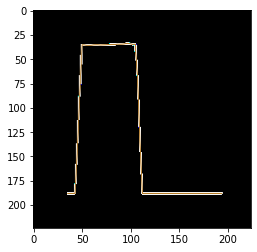

In [ ]:
A = X_test[0,:,:,:]
A[A==1] = 0
# np.where(X_test[0,:,:,:]==1, 0,tempX[0,:,:,:])
plt.imshow(A)

In [ ]:
last_conv_layer = model.get_layer('conv2d_2')
grads = tf.gradients(Bad_output, last_conv_layer.output)

ValueError: ignored

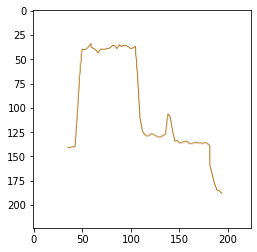

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_test[283,:,:,:])
plt.show()


In [ ]:
items

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
activation = activation_model.predict(res)

ValueError: ignored

In [ ]:
Y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
predict_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [ ]:
score

0.14887640449438203

In [ ]:
#Save Model
from tensorflow.keras.models import load_model
model.save(f'{day}VAR{SVID}_model.h5')

In [ ]:
#Load Model
from tensorflow.keras.models import load_model
model = load_model('VAR010_model.h5')

OSError: ignored

In [ ]:


os.getcwd()
SVID = 10
# train_str = f"/content/gdrive/My Drive/Colab Notebook/TrainingV{SVID}/"
# test_str = f"/content/gdrive/My Drive/Colab Notebook/TestingV{SVID}/"
train_str = "/content/gdrive/My Drive/Colab Notebook/Train1/"
test_str = "/content/gdrive/My Drive/Colab Notebook/Test1/"
img_size = 224

labels = os.listdir(train_str)
print(labels[0][-5])


X_train = []
Y_train = []
# 製作訓練用資料集及標籤
c = 0
for i in labels:
    print(i,c)
    img = cv2.imread(train_str + i, cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
    res = cv2.resize(img,(img_size,img_size),interpolation = cv2.INTER_LINEAR)
    res = img_to_array(res)
    X_train.append(res)    
    Y_train.append(i[-5])
    c+=1

#Y_label_org = Y_train

# 轉換至array的格式
X_train = np.array(X_train)
Y_train = np.array(Y_train)    

#Check number of images loaded
X_train.shape

for i in range(len(X_train)):
    X_train[i] = X_train[i].astype('float32')  
    # 將標籤轉換至float格式
    
for j in range(len(Y_train)):
    Y_train[j] = Y_train[j].astype('float32')  
    # 將標籤轉換至float格式
    
# Y = tf.strings.to_number(Y, out_type=tf.float32)

# 標籤進行one-hotencoding
Y_train = np_utils.to_categorical(Y_train)

# # 分配訓練集及測試集比例
# x_train = X
# y_train = Y

# y_train_label = [0.,0.]

# for i in range(0,len(Y_train)):
#     y_train_label = Y_train[i] + y_train_label





In [ ]:
# Load Testing Images
labels = []
labels = os.listdir(test_str)

X_test = []
Y_test = []
# 製作訓練用資料集及標籤
c = 0
for i in labels:
    print(i,c)
    img = cv2.imread(test_str + i, cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
    res = cv2.resize(img,(img_size,img_size),interpolation = cv2.INTER_LINEAR)
    res = img_to_array(res)
    X_test.append(res)    
    Y_test.append(i[-5])
    c+=1
Y_label_org = Y_test   
# 轉換至array的格式
X_test = np.array(X_test)
Y_test = np.array(Y_test)

for i in range(len(X_test)):
    X_test[i] = X_test[i].astype('float32')  
    # 將標籤轉換至float格式
    
for j in range(len(Y_test)):
    Y_test[j] = Y_test[j].astype('float32')  
    # 將標籤轉換至float格式
    
# # 分配訓練集及測試集比例
# x_test = X
# y_test = Y   

# 標籤進行one-hotencoding
Y_test = np_utils.to_categorical(Y_test)
# y_test = Y



In [ ]:
#Create model
model = tf.keras.Sequential()

model.add(layers.Conv2D(16,(3,3),
                 strides=(1,1),
                 input_shape=(224, 224, 3),
                 padding='same',
                 activation='relu',
                 ))

model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=None))

model.add(layers.Conv2D(32,(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu',
                 ))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=None))

model.add(layers.Conv2D(64,(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu',
                 ))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=None))

model.add(layers.Flatten())

model.add(layers.Dense(64,activation='relu'))

model.add(layers.Dense(128,activation='relu'))


model.add(layers.Dropout(0.2))

model.add(layers.Dense(2,activation='softmax'))

model.summary()

# Model optimizer
model.compile(optimizer=optimizers.Adam(lr=2e-5),loss=tf.keras.losses.BinaryCrossentropy(),metrics = ['acc'])


datagen = ImageDataGenerator(
    zca_whitening=False,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# 導入圖像增強參數
datagen.fit(X_train)
X_train = X_train/255
X_test = X_test/255
print('rescale！done!')

# Check Testing data
Y_test.shape

# Training model

batch_size = 200 
epochs = 30
# 檔名設定
file_name = str(epochs)+'_'+str(batch_size)
# 加入EarlyStopping以及Tensorboard等回調函數
# CB = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
TB = keras.callbacks.TensorBoard(log_dir='./log'+"_"+file_name, histogram_freq=1)

history = model.fit(
    X_train ,  Y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split = 0.,
    # callbacks = [CB]
)


def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)


# 測試集標籤預測
y_pred = model.predict(X_test)

# 整體準確度
count = 0
for i in range(len(y_pred)):
    if(np.argmax(y_pred[i]) == np.argmax(Y_test[i])): #argmax函数找到最大值的索引，即为其类别
        count += 1
        print(count)
score = count/len(y_pred)
print('正確率為:%.2f%s' % (score*100,'%'))

# 模型預測後的標籤
predict_label = np.argmax(y_pred,axis=1)

# 模型原標籤
true_label = Y_label_org
true_label = np.array(true_label)

test_loss, test_val = model.evaluate(X_test,Y_test)
print("loss",test_loss)
print("val",test_val)
pd.crosstab(true_label,predict_label,rownames=['實際值'],colnames=['預測值'])

In [ ]:
predict_label

Epoch 1/100
27/27 [==============================] - 3s 120ms/step - loss: 0.4179 - acc: 0.8687
Epoch 2/100
27/27 [==============================] - 3s 120ms/step - loss: 0.3733 - acc: 0.8718
Epoch 3/100
27/27 [==============================] - 3s 123ms/step - loss: 0.3530 - acc: 0.8741
Epoch 4/100
27/27 [==============================] - 3s 120ms/step - loss: 0.3369 - acc: 0.8771
Epoch 5/100
27/27 [==============================] - 3s 118ms/step - loss: 0.3309 - acc: 0.8771
Epoch 6/100
27/27 [==============================] - 3s 119ms/step - loss: 0.3221 - acc: 0.8816
Epoch 7/100
27/27 [==============================] - 3s 119ms/step - loss: 0.3209 - acc: 0.8832
Epoch 8/100
27/27 [==============================] - 3s 118ms/step - loss: 0.3045 - acc: 0.8885
Epoch 9/100
27/27 [==============================] - 3s 119ms/step - loss: 0.3036 - acc: 0.8862
Epoch 10/100
27/27 [==============================] - 3s 119ms/step - loss: 0.3013 - acc: 0.8930
Epoch 11/100
27/27 [===================

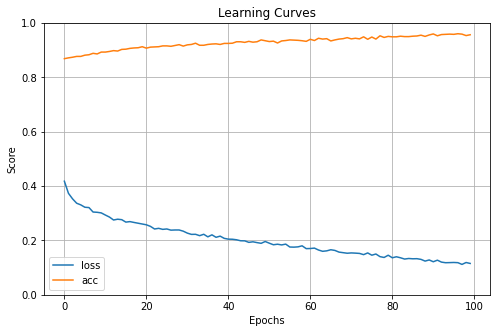

In [ ]:
# Training model

batch_size = 50 
epochs = 100
# 檔名設定
file_name = str(epochs)+'_'+str(batch_size)
# 加入EarlyStopping以及Tensorboard等回調函數
# CB = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
TB = keras.callbacks.TensorBoard(log_dir='./log'+"_"+file_name, histogram_freq=1)

history = model.fit(
    X_train ,  Y_train,
    batch_size = batch_size,
    epochs = epochs,
    # validation_split = 0.2,
    # callbacks = [CB]
)


def plot_learning_curves(history,title="Learning Curves"):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.title('Learning Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)



In [ ]:
#Load Model
from tensorflow.keras.models import load_model
model = load_model('0519VAR8_model.h5')

In [ ]:
# 測試集標籤預測
y_pred = model.predict(X_test)

# 整體準確度

count = 0
for i in range(len(y_pred)):
    if(np.argmax(y_pred[i]) == np.argmax(Y_test[i])): #argmax函数找到最大值的索引，即为其类别
        count += 1
    else:
        print(labels[i])
score = count/len(y_pred)
print('正確率為:%.2f%s' % (score*100,'%'))

# 模型預測後的標籤
predict_label = np.argmax(y_pred,axis=1)

# 模型原標籤
true_label = Y_label_org
true_label = np.array(true_label)

test_loss, test_val = model.evaluate(X_test,Y_test)
print("loss",test_loss)
print("val",test_val)
pd.crosstab(true_label,predict_label,rownames=['Actual'],colnames=['Predicted'])

L022_WA0213_VAR014 1.png
L118_WA1184_VAR014 1.png
L123_WA1239_VAR014 0.png
L125_WA1247_VAR014 0.png
L128_WA1282_VAR014 0.png
L125_WA1256_VAR014 0.png
L128_WA1278_VAR014 0.png
L127_WA1270_VAR014 0.png
L127_WA1269_VAR014 0.png
L127_WA1268_VAR014 0.png
L127_WA1274_VAR014 0.png
L127_WA1273_VAR014 0.png
L127_WA1276_VAR014 0.png
L129_WA1288_VAR014 0.png
L126_WA1266_VAR014 0.png
L132_WA1326_VAR014 0.png
L130_WA1308_VAR014 0.png
L131_WA1311_VAR014 0.png
L130_WA1299_VAR014 0.png
L130_WA1304_VAR014 0.png
L130_WA1298_VAR014 0.png
L135_WA1352_VAR014 0.png
L136_WA1362_VAR014 0.png
L138_WA1381_VAR014 0.png
L137_WA1377_VAR014 0.png
L143_WA1432_VAR014 0.png
正確率為:92.22%
11/11 [==============================] - 0s 27ms/step - loss: 0.3062 - acc: 0.9222
loss 0.30616340041160583
val 0.9221556782722473


Predicted,0,1
Actual,,
0,17,24
1,2,291


In [ ]:
labels[0]

In [ ]:
# Check GB Ratio
good = 0
bad = 0
for j in range(len(Y_test)):
  if Y_test[j][0] == 0:
    good += 1
  else:
    bad += 1

print("Good =", good)
print("Bad =", bad)


In [ ]:
from distutils.dir_util import copy_tree
copy_tree("/content/gdrive/My Drive/Colab Notebook/", "/content/Thesis/")

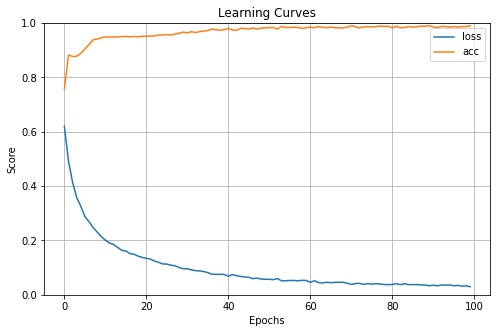

In [ ]:
plot_learning_curves(history)
